# Data Preparation

In [21]:
from load_data import get_individual_data
from EngineerFeature import add_alpha_factors

In [22]:
from EngineerFeature import *

In [23]:
cd

/home/dhruv


In [24]:
cd momentum-trader/momentum-trader/

/home/dhruv/momentum-trader/momentum-trader


In [25]:
import numpy as np 
import pandas as pd

df = pd.read_csv("linear_regressor_symbols.csv")

In [26]:
symbols = list(df[df["Precision"] > 0.77].Symbol)

In [27]:
len(symbols)

217

In [28]:
from load_data import get_individual_data
from EngineerFeature import add_alpha_factors
from EngineerFeature import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, roc_auc_score, precision_score
import yfinance as yf
import datetime



filtered_models = []

for symbol in symbols:
    try:
        # Fetch individual stock data using yfinance
        ticker = symbol + ".NS"  # Replace with the desired stock ticker
        start_date = '2015-01-01'
        end_date = datetime.date.today()
        stock_data = yf.download(ticker, start=start_date, end=end_date)

        # Add alpha factors to the stock data
        stock_data_with_alpha = add_alpha_factors(stock_data)

        # Display the updated stock data
        data = stock_data_with_alpha

        # creating the target variable
        data = forward_returns(10,data)
        data = binary_target_with_percentage(10,data,0.05)


        # making th price stationary
        data = data.dropna()
        SClose = np.diff(data["Close"])
        data = data[1:]
        data["SClose"] = SClose 

        # training the model


        # Features (alpha factors)
        #features = ['Alpha_Factor_1', 'Alpha_Factor_2', ...]  # Replace with actual alpha factor columns

        # Target variables
        target_forward_returns = 'Forward_Returns'
        target_binary = 'Binary_Target_Percentage'

        # Split the data into training and testing sets
        X_train, X_test, y_train_forward, y_test_forward, y_train_binary, y_test_binary = train_test_split(
            data[['Close', 'Volume', 'SMA_10',
               'SMA_50', 'RSI', 'MACD', 'Upper_Band', 'Middle_Band', 'Lower_Band',
               'ATR', 'OBV', 'SMA_Cross', 'BB_Deviation', 'Inside_BB',
               'Distance_from_Lower', 'Distance_from_Upper']],
            data["Forward_Returns"],
            data["Binary_Target_Percentage"],
            test_size=0.2,
            random_state=42
        )

        # Train Linear Regression for Forward Returns
        linear_reg_model = LinearRegression()
        linear_reg_model.fit(X_train, y_train_forward)

        # Train Logistic Regression for Binary Classification
#         logistic_reg_model = LogisticRegression()
#        logistic_reg_model.fit(X_train, y_train_binary)

        # Make predictions
        y_pred_forward = linear_reg_model.predict(X_test)
        y_pred_binary = np.where(y_pred_forward > 0.05,1,0)

        # Evaluate Linear Regression
        mse = mean_squared_error(y_test_forward, y_pred_forward)
        rmse = mse ** 0.5
        r2 = linear_reg_model.score(X_test, y_test_forward)

        # Evaluate Logistic Regression
        accuracy = accuracy_score(y_test_binary, y_pred_binary)
        precision = precision_score(y_test_binary, y_pred_binary)
#         roc_auc = roc_auc_score(y_test_binary, logistic_reg_model.predict_proba(X_test)[:, 1])  # For ROC-AUC

        filtered_models.append((symbol,linear_reg_model))

    #     print("Linear Regression Metrics:")
    #     print(f"MSE: {mse:.4f}")
    #     print(f"RMSE: {rmse:.4f}")
    #     print(f"R-squared: {r2:.4f}\n")

    #     print("Logistic Regression Metrics:")
    #     print(f"Accuracy: {accuracy:.4f}")
    #     print(f"ROC-AUC: {roc_auc:.4f}")
    #     print(f"Precision: {precision}")

    #     # Print classification report for Logistic Regression
    #     print("\nClassification Report:")
    #     print(classification_report(y_test_binary, y_pred_binary))
    except Exception as exc:
            print(exc)
        

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [29]:
import pandas as pd
import datetime

# Create an empty list to store the data
result_data = []

for symbol, model in filtered_models:
    try:
        da = yf.download(symbol+".NS", start="2023-06-01", end=datetime.date.today())
        da = add_alpha_factors(da)
        da = da.drop(["Adj Close", "High", "Low", "Open"], axis=1)
        da.dropna(inplace=True)
        predis = model.predict(da)

        # Append data to the result list
        for date, prediction in zip(da.index, predis):
            result_data.append({"Date": date, "Symbol": symbol, "Prediction": prediction})
    except: 
        pass

    # Create a DataFrame from the result data
result_df = pd.DataFrame(result_data)

#print(result_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [51]:
result_df[result_df["Date"]>'2023-09-01'][result_df['Prediction'] > 0.07]

/tmp/ipykernel_5326/1146605207.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_df[result_df["Date"]>'2023-09-01'][result_df['Prediction'] > 0.07]


,Date,Symbol,Prediction
37,2023-09-04,POWERINDIA,0.071242
38,2023-09-05,POWERINDIA,0.073381
39,2023-09-06,POWERINDIA,0.078957
146,2023-09-08,AEGISCHEM,0.079831
395,2023-09-07,BAJAJHLDNG,0.095443
396,2023-09-08,BAJAJHLDNG,0.113194
728,2023-09-04,CEATLTD,0.089921
729,2023-09-05,CEATLTD,0.075200
1021,2023-09-04,DISHTV,0.090232
3236,2023-09-04,PFC,0.071211


In [437]:
pd.DataFrame(filtered_ticks).to_csv("linear_regressor_symbols.csv")

In [398]:
data = forward_returns(10,data)
data = binary_target_with_percentage(10,data,0.05)

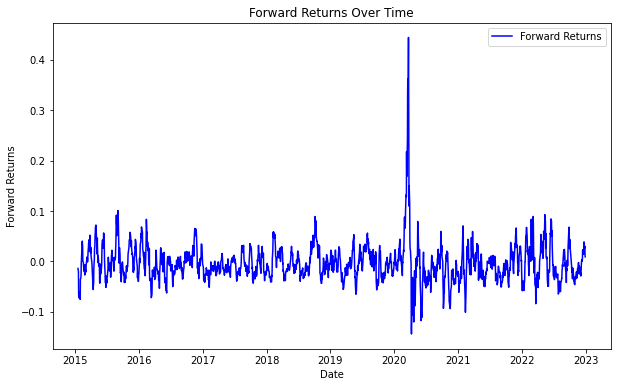

In [275]:
#eda?

import matplotlib.pyplot as plt

# Plotting target variable (Forward Returns)
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Forward_Returns'], label='Forward Returns', color='blue')
plt.xlabel('Date')
plt.ylabel('Forward Returns')
plt.title('Forward Returns Over Time')
plt.legend()
plt.show()


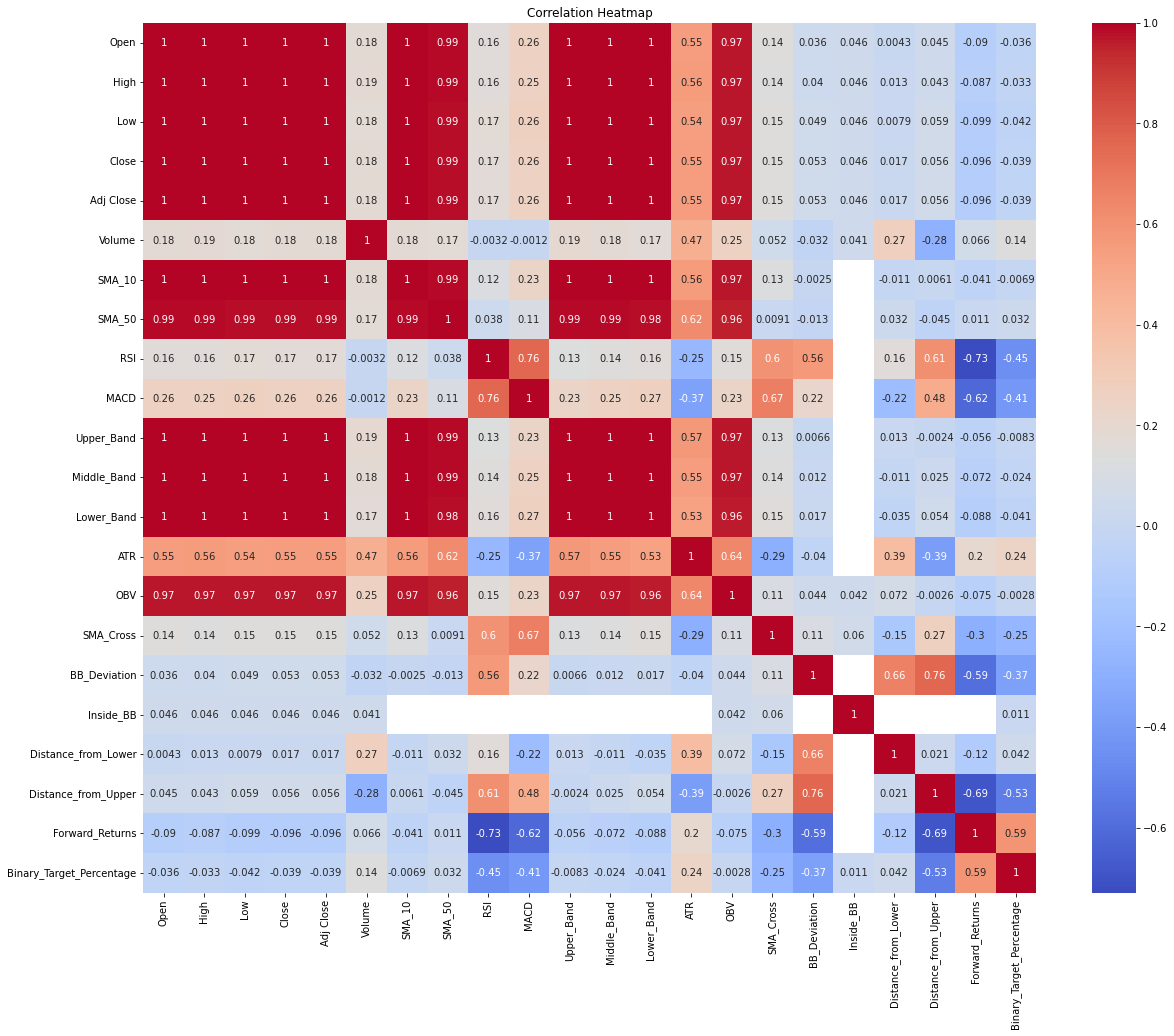

In [276]:
# Calculate correlation matrix
stock_data_with_binary_target = data
correlation_matrix = stock_data_with_binary_target.corr()

# Plot heatmap of correlation matrix
import seaborn as sns
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


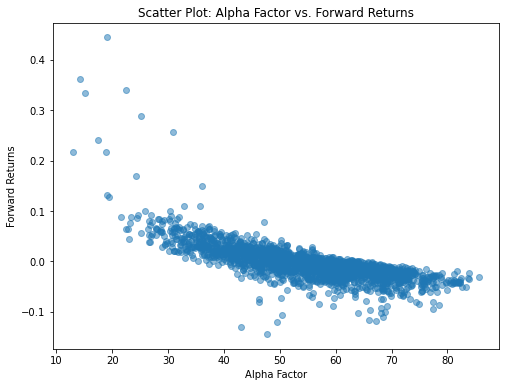

In [277]:
# Scatter plot between a specific alpha factor and target variable
plt.figure(figsize=(8, 6))
plt.scatter(data['RSI'], data['Forward_Returns'], alpha=0.5)
plt.xlabel('Alpha Factor')
plt.ylabel('Forward Returns')
plt.title('Scatter Plot: Alpha Factor vs. Forward Returns')
plt.show()


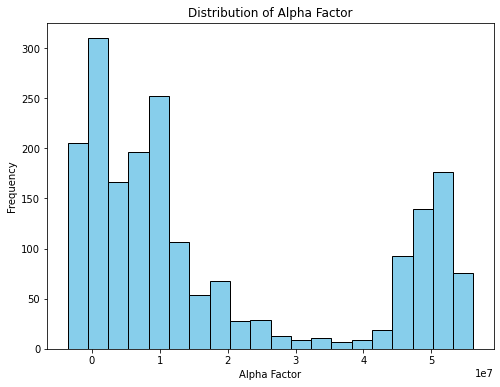

In [278]:
# Histogram of a specific alpha factor
plt.figure(figsize=(8, 6))
plt.hist(data['OBV'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Alpha Factor')
plt.ylabel('Frequency')
plt.title('Distribution of Alpha Factor')
plt.show()


In [399]:
data = data.dropna()

In [400]:
data

,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_50,RSI,MACD,...,Lower_Band,ATR,OBV,SMA_Cross,BB_Deviation,Inside_BB,Distance_from_Lower,Distance_from_Upper,Forward_Returns,Binary_Target_Percentage
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-17,180.460007,182.479996,179.809998,180.770004,163.198074,4794840,180.280502,169.616601,67.669811,3.754485,...,179.265547,4.156308,1.046013e+08,1,-0.001607,1,0.008309,-0.011524,-0.017177,0
2010-03-18,181.240005,181.240005,179.050003,180.089996,162.584183,3501970,180.478001,169.807000,65.270841,3.598529,...,179.670400,4.015857,1.010993e+08,1,-0.002493,1,0.002324,-0.007309,-0.010967,0
2010-03-19,181.479996,182.479996,179.764999,181.985001,164.294968,6339840,180.836502,170.032300,68.610451,3.586502,...,179.594692,3.922939,1.074392e+08,1,0.005931,1,0.013213,-0.001350,-0.019699,0
2010-03-22,180.199997,185.500000,179.800003,183.710007,165.852295,15305610,181.365503,170.289800,71.314583,3.673814,...,178.768630,4.049871,1.227448e+08,1,0.012718,1,0.027240,-0.001805,-0.028795,0
2010-03-23,183.500000,189.000000,183.500000,188.399994,170.086365,10154380,182.093503,170.632200,77.092657,4.074484,...,177.048956,4.153452,1.328991e+08,1,0.029559,1,0.062031,-0.002913,-0.038641,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,1599.500000,1639.000000,1590.000000,1629.449951,1610.975464,4953661,1631.690015,1567.892007,55.951814,12.995141,...,1592.449683,26.316450,1.248005e+09,1,0.007058,1,0.022867,-0.008752,0.008776,0
2022-12-27,1633.000000,1635.949951,1613.500000,1631.099976,1612.606812,3963386,1629.970007,1571.734006,56.379669,12.615853,...,1593.051110,26.040271,1.251968e+09,1,0.008364,1,0.023522,-0.006793,0.010545,0
2022-12-28,1623.099976,1633.000000,1623.099976,1629.800049,1611.321533,4345935,1626.725012,1575.399006,55.918840,12.071222,...,1593.608879,24.887397,1.247622e+09,1,0.006043,1,0.022340,-0.010254,0.019910,0


In [401]:
SClose = np.diff(data["Close"])
data = data[1:]
data["SClose"] = SClose 

/tmp/ipykernel_5841/3951461371.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SClose"] = SClose


In [402]:
data

,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_50,RSI,MACD,...,ATR,OBV,SMA_Cross,BB_Deviation,Inside_BB,Distance_from_Lower,Distance_from_Upper,Forward_Returns,Binary_Target_Percentage,SClose
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-18,181.240005,181.240005,179.050003,180.089996,162.584183,3501970,180.478001,169.807000,65.270841,3.598529,...,4.015857,1.010993e+08,1,-0.002493,1,0.002324,-0.007309,-0.010967,0,-0.680008
2010-03-19,181.479996,182.479996,179.764999,181.985001,164.294968,6339840,180.836502,170.032300,68.610451,3.586502,...,3.922939,1.074392e+08,1,0.005931,1,0.013213,-0.001350,-0.019699,0,1.895004
2010-03-22,180.199997,185.500000,179.800003,183.710007,165.852295,15305610,181.365503,170.289800,71.314583,3.673814,...,4.049871,1.227448e+08,1,0.012718,1,0.027240,-0.001805,-0.028795,0,1.725006
2010-03-23,183.500000,189.000000,183.500000,188.399994,170.086365,10154380,182.093503,170.632200,77.092657,4.074484,...,4.153452,1.328991e+08,1,0.029559,1,0.062031,-0.002913,-0.038641,0,4.689987
2010-03-25,188.000000,193.000000,187.020004,192.615005,173.891663,23296400,183.210503,171.054400,80.829949,4.678207,...,4.283919,1.561955e+08,1,0.039140,1,0.088293,-0.010013,-0.057991,0,4.215012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,1599.500000,1639.000000,1590.000000,1629.449951,1610.975464,4953661,1631.690015,1567.892007,55.951814,12.995141,...,26.316450,1.248005e+09,1,0.007058,1,0.022867,-0.008752,0.008776,0,31.799927
2022-12-27,1633.000000,1635.949951,1613.500000,1631.099976,1612.606812,3963386,1629.970007,1571.734006,56.379669,12.615853,...,26.040271,1.251968e+09,1,0.008364,1,0.023522,-0.006793,0.010545,0,1.650024
2022-12-28,1623.099976,1633.000000,1623.099976,1629.800049,1611.321533,4345935,1626.725012,1575.399006,55.918840,12.071222,...,24.887397,1.247622e+09,1,0.006043,1,0.022340,-0.010254,0.019910,0,-1.299927


In [406]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, roc_auc_score, precision_score

# Assuming you have the stock_data_with_binary_target_percentage DataFrame

# Features (alpha factors)
#features = ['Alpha_Factor_1', 'Alpha_Factor_2', ...]  # Replace with actual alpha factor columns

# Target variables
target_forward_returns = 'Forward_Returns'
target_binary = 'Binary_Target_Percentage'

# Split the data into training and testing sets
X_train, X_test, y_train_forward, y_test_forward, y_train_binary, y_test_binary = train_test_split(
    data[['SClose', 'Volume', 'SMA_10',
       'SMA_50', 'RSI', 'MACD', 'Upper_Band', 'Middle_Band', 'Lower_Band',
       'ATR', 'OBV', 'SMA_Cross', 'BB_Deviation', 'Inside_BB',
       'Distance_from_Lower', 'Distance_from_Upper']],
    data["Forward_Returns"],
    data["Binary_Target_Percentage"],
    test_size=0.2,
    random_state=42
)

# Train Linear Regression for Forward Returns
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train_forward)

# Train Logistic Regression for Binary Classification
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train, y_train_binary)

# Make predictions
y_pred_forward = linear_reg_model.predict(X_test)
y_pred_binary = np.where(y_pred_forward > 0.05,1,0)

# Evaluate Linear Regression
mse = mean_squared_error(y_test_forward, y_pred_forward)
rmse = mse ** 0.5
r2 = linear_reg_model.score(X_test, y_test_forward)

# Evaluate Logistic Regression
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
roc_auc = roc_auc_score(y_test_binary, logistic_reg_model.predict_proba(X_test)[:, 1])  # For ROC-AUC

print("Linear Regression Metrics:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}\n")

print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Precision: {precision}")

# Print classification report for Logistic Regression
print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred_binary))


Linear Regression Metrics:
MSE: 0.0005
RMSE: 0.0216
R-squared: 0.7643

Logistic Regression Metrics:
Accuracy: 0.9462
ROC-AUC: 0.5441
Precision: 0.7659574468085106

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       573
           1       0.77      0.61      0.68        59

    accuracy                           0.95       632
   macro avg       0.86      0.80      0.82       632
weighted avg       0.94      0.95      0.94       632



In [250]:
X_test.iloc[1]

Close                  4.033500e+02
Volume                 4.241408e+06
SMA_10                 4.146150e+02
SMA_50                 4.343160e+02
RSI                    3.549718e+01
MACD                  -9.781777e+00
Upper_Band             4.159639e+02
Middle_Band            4.031300e+02
Lower_Band             3.902961e+02
ATR                    9.283414e+00
OBV                    5.213623e+08
SMA_Cross              0.000000e+00
BB_Deviation           5.457478e-04
Inside_BB              1.000000e+00
Distance_from_Lower    3.238148e-02
Distance_from_Upper   -3.128999e-02
Name: 2021-11-24 00:00:00, dtype: float64

In [407]:
data2 = yf.download("^NSEI",start="2022-05-01",end="2023-08-26")
data2 = add_alpha_factors(data2)
data2 = data2.dropna()

[*********************100%***********************]  1 of 1 completed


In [408]:
data2 = data2.drop(["Adj Close","Low","Open","High"],axis=1)

In [409]:
len(data2)

280

In [410]:
preds = linear_reg_model.predict(data2)
len(preds)
predictions =  pd.DataFrame(data2.index )
predictions["Return"] = preds

In [ ]:
predictions[predictions.Return > 0.1]

In [ ]:
import backtrader as bt

class LinearRegressionStrategy(bt.Strategy):
    params = (
        ('alpha_factor', None),
        # Other parameters
    )

    def __init__(self):
        self.linear_model = your_trained_linear_regression_model
        self.data_close = self.datas[0].close
        # Add other data feeds and indicators

    def next(self):
        # Calculate alpha factor and other indicators
        alpha_factor = self.linear_model.predict([self.data_close[0]])[0]
        
        # Generate buy/sell signals based on alpha factor
        if alpha_factor > some_threshold:
            self.buy()

        # Add logic for order execution and management
        # ...


# Instantiate a Cerebro engine
cerebro = bt.Cerebro()

# Add data feed (load your historical price data here)
data = bt.feeds.PandasData(dataname=your_data_frame)

cerebro.adddata(data)

# Add strategy with appropriate parameters
cerebro.addstrategy(LinearRegressionStrategy, alpha_factor=your_selected_alpha_factor)

# Set initial cash and commission
cerebro.broker.set_cash(100000)
cerebro.broker.setcommission(commission=0.001)

# Print the starting cash amount
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run the backtest
cerebro.run()

# Print the ending cash amount
print('Ending Portfolio Value: %.2f' % cerebro.broker.getvalue())


In [318]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(stationary_data)

# Extract test statistic and p-value
adf_statistic = result[0]
p_value = result[1]

# Interpretation
if p_value <= 0.05:
    print("Reject the null hypothesis: The data is stationary")
    print("this is the p_value",p_value)

else:
    print("Fail to reject the null hypothesis: The data is non-stationary")


Reject the null hypothesis: The data is stationary
this is the p_value 1.7961063667795806e-28


In [314]:
import numpy as np

# Perform first-order differencing
stationary_data = np.diff(data["Close"])

# Perform ADF test on the differenced data
adf_result = adfuller(stationary_data)
adf_p_value = adf_result[1]

if adf_p_value <= 0.05:
    print("After differencing, the data is stationary.")
else:
    print("After differencing, the data is still non-stationary.")


After differencing, the data is stationary.


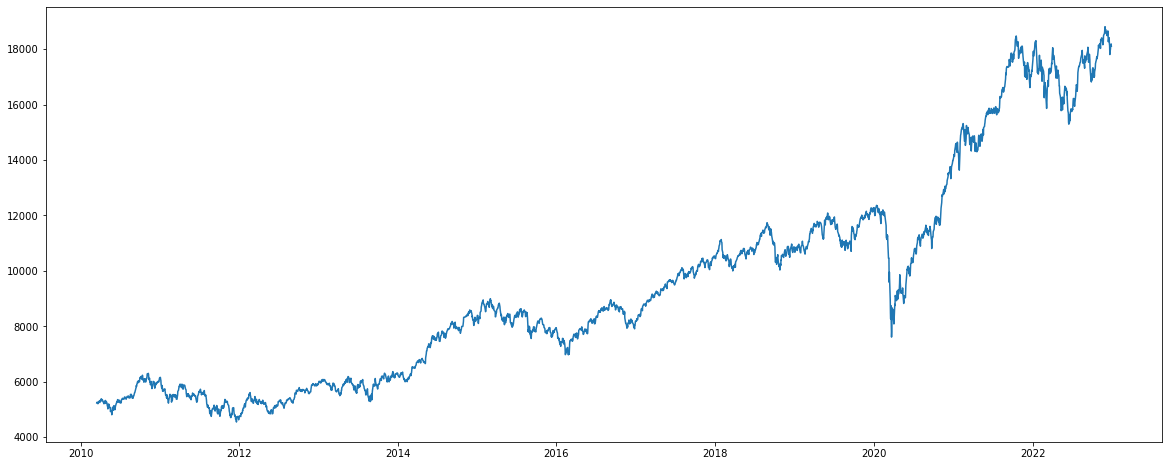

In [324]:
plt.figure(figsize=(20,8))
plt.plot(data["Close"])

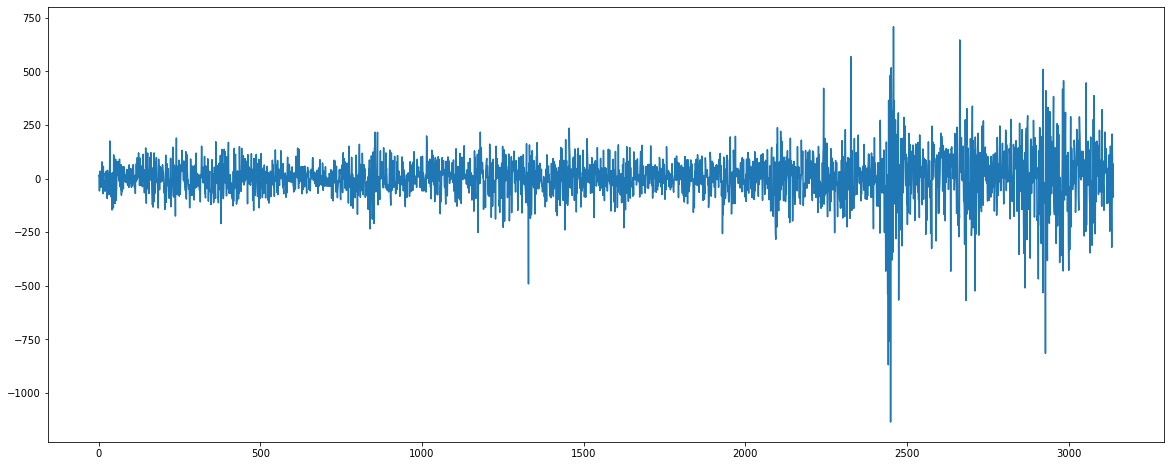

In [326]:
plt.figure(figsize=(20,8))

plt.plot(stationary_data)

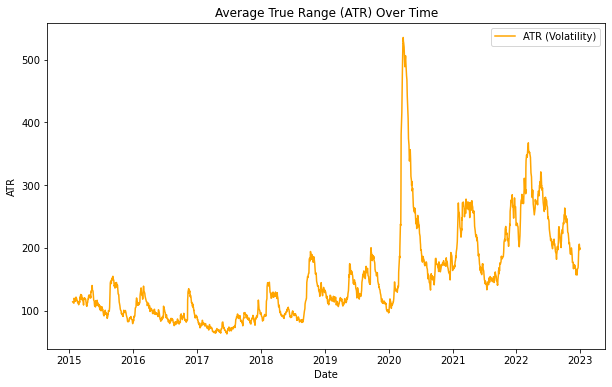

In [279]:
# Plot ATR (Volatility) over time
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['ATR'], label='ATR (Volatility)', color='orange')
plt.xlabel('Date')
plt.ylabel('ATR')
plt.title('Average True Range (ATR) Over Time')
plt.legend()
plt.show()
